<h1>Two hidden layer Neural Network in Tensorflow</h1>

In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
from util import get_normalized_data, y2indicator

In [3]:
def error_rate(p,r):
    return np.mean(p != r)

In [6]:
def main():
    # Get the data and variables
    X,Y =get_normalized_data()
    max_iter = 30
    print_period = 10
    lr = 0.00004
    reg = 0.01
    
    Xtrain = X[:-1000,]
    Ytrain = Y[:-1000]
    Xtest = X[-1000:]
    Ytest = Y[-1000:]
    
    Ytrain_ind = y2indicator(Ytrain)
    Ytest_ind = y2indicator(Ytest)
    
    N,D = Xtrain.shape
    batch_sz = 500
    n_batches = N/batch_sz
    
    # Creating initial values for weights and bias variables
    M1 = 300
    M2 = 100
    K = 10
    W1_init = np.random.randn(D,M1) / 28
    b1_init = np.zeros(M1)
    W2_init = np.random.randn(M1,M2)/np.sqrt(M1)
    b2_init = np.zeros(M2)
    W3_init = np.random.randn(M2,K)/np.sqrt(M2)
    b3_init = np.zeros(K)
    
    # Define Tensorflow variables and expressions
    # Tensorflow variables are like Theano shared variables but,
    # Theano variables are like Tensorflow placeholders.
    
    X = tf.placeholder(tf.float32, shape=[None, D], name='X')
    T = tf.placeholder(tf.float32, shape=[None, K], name="T")
    W1 = tf.Variable(W1_init.astype(np.float32))
    b1 = tf.Variable(b1_init.astype(np.float32))
    W2 = tf.Variable(W2_init.astype(np.float32))
    b2 = tf.Variable(b2_init.astype(np.float32))
    W3 = tf.Variable(W3_init.astype(np.float32))
    b3 = tf.Variable(b3_init.astype(np.float32))
    
    # Using Tensorflow functions to define the model
    Z1 = tf.nn.relu(tf.matmul(X,W1) + b1)
    Z2 = tf.nn.relu(tf.matmul(Z1,W2) + b2)
    Yish = tf.matmul(Z2,W3) + b3 # Softmax is included in the cost calculation for some reason.
    
    # softmax_cross_entropy_with_logits takes in the "logits"
    # if you wanted to know the actual output of the neural net,
    # you could pass "Yish" into tf.nn.softmax(logits)
    cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=Yish, labels=T))
    
    # One difference between Theano and TensorFlow is that you don't write the updates
    # yourself in TensorFlow. You choose an optimizer that implements the algorithm you want.
    train_op = tf.train.RMSPropOptimizer(lr, decay=0.99, momentum=0.9).minimize(cost)

    predict_op = tf.argmax(Yish,1)
    LL = [] # Loglikelihood
    init = tf.initialize_all_variables()
    with tf.Session() as session:
        session.run(init)
        
        for i in xrange(max_iter):
            for j in xrange(n_batches):
                Xbatch = Xtrain[j*batch_sz:(j+1)*batch_sz,]
                Ybatch = Ytrain_ind[j*batch_sz:(j+1)*batch_sz,]
    
                session.run(train_op, feed_dict={X: Xbatch, T: Ybatch})
                if j % print_period ==0:
                    test_cost = session.run(cost, feed_dict={X:Xtest, T:Ytest_ind})
                    prediction = session.run(predict_op, feed_dict={X: Xtest})
                    err = error_rate(prediction, Ytest)
                    print "Cost / err at iteration i=%d, j=%d: %.3f / %.3f" % (i,j,test_cost,err)
                    LL.append(test_cost)
    return LL

In [7]:
if __name__ == "__main__":
    LL = main()

Reading in and transforming data...
Cost / err at iteration i=0, j=0: 2299.067 / 0.865
Cost / err at iteration i=0, j=10: 1494.776 / 0.318
Cost / err at iteration i=0, j=20: 797.731 / 0.201
Cost / err at iteration i=0, j=30: 499.390 / 0.143
Cost / err at iteration i=0, j=40: 401.600 / 0.114
Cost / err at iteration i=0, j=50: 351.641 / 0.103
Cost / err at iteration i=0, j=60: 326.006 / 0.098
Cost / err at iteration i=0, j=70: 307.573 / 0.090
Cost / err at iteration i=0, j=80: 296.431 / 0.087
Cost / err at iteration i=1, j=0: 292.556 / 0.085
Cost / err at iteration i=1, j=10: 273.500 / 0.082
Cost / err at iteration i=1, j=20: 260.030 / 0.077
Cost / err at iteration i=1, j=30: 244.592 / 0.073
Cost / err at iteration i=1, j=40: 240.762 / 0.076
Cost / err at iteration i=1, j=50: 227.865 / 0.068
Cost / err at iteration i=1, j=60: 219.386 / 0.071
Cost / err at iteration i=1, j=70: 213.482 / 0.064
Cost / err at iteration i=1, j=80: 213.238 / 0.063
Cost / err at iteration i=2, j=0: 211.793 / 0.

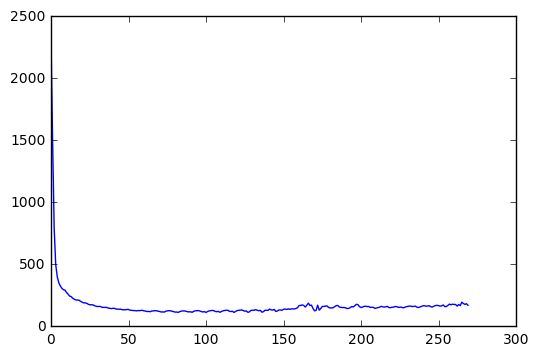

In [8]:
plt.plot(LL)
plt.show()

It can be seen that the Log-likelihood increase after a while. 
It means our model starts overfitting.